# Exploratory Analysis

The aim of this notebook is to carry out exploratory analyses and get a better feel for the first dataset (1995-2000).

This notebook is based on the following tutorial: https://github.com/topspinj/tmls-2020-recommender-workshop/blob/master/tutorial.ipynb

In [12]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Import data (here Time interval 1)
ratings = pd.read_csv("../data/interim/ratings_TI1.csv")
movies = pd.read_csv("../data/interim/movies_TI1.csv")

In [32]:
# Size of the dataset

print(f"Number or ratings: {ratings.shape[0]}")
print(f"Number of unique movies: {ratings['movieId'].nunique()}")
print(f"Number of unique users: {ratings['userId'].nunique()}")
print(f"Average number of ratings per user: {round(ratings.shape[0] / ratings['userId'].nunique(), 2)}")
print(f"Average number of ratings per movie: {round(ratings.shape[0] / ratings['movieId'].nunique(), 2)}")

Number or ratings: 3977249
Number of unique movies: 3163
Number of unique users: 47741
Average number of ratings per user: 83.31
Average number of ratings per movie: 1257.43


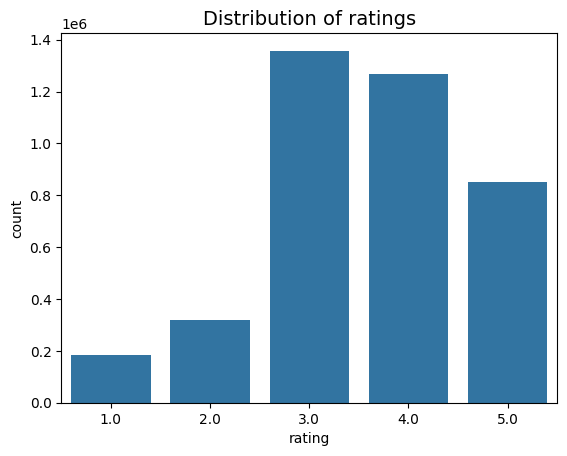

In [13]:
# How are ratings distributed (over all movies)?
sns.countplot(data=ratings, x='rating')
plt.title('Distribution of ratings', fontsize=14)
plt.show()

In [62]:
# Which movies are most frequently rated?

movie_ratings = ratings.merge(movies, on='movieId')
movie_ratings['title'].value_counts().head(10)

title
Apollo 13 (1995)                             24536
Braveheart (1995)                            20183
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    19435
Batman Forever (1995)                        19393
Die Hard: With a Vengeance (1995)            18691
Independence Day (a.k.a. ID4) (1996)         18687
Toy Story (1995)                             18014
Outbreak (1995)                              16766
Twister (1996)                               16178
Crimson Tide (1995)                          16172
Name: count, dtype: int64

In [63]:
def get_movie_title_by_id(id):
    return movie_ratings[movie_ratings['movieId'] == id]['title'].values[0]

In [65]:
# Lowest and highest rated movies
mean_ratings = movie_ratings.groupby('movieId')[['rating']].mean()
lowest_rated = mean_ratings["rating"].idxmin()
highest_rated = mean_ratings["rating"].idxmax()

print(f"Lowest rated movie: {get_movie_title_by_id(lowest_rated)}: {mean_ratings.loc[lowest_rated].values[0]}")
print(f"Highest rated movie: {get_movie_title_by_id(highest_rated)}: {mean_ratings.loc[highest_rated].values[0]}")


Lowest rated movie: Criminals (1996): 1.0
Highest rated movie: American Beauty (1999): 4.4832843006151375
